In [5]:
# Customer Segmentation / Clustering for eCommerce Transactions Dataset

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [7]:
# Load datasets
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [9]:
# Merge profile and transaction information
# Aggregate transaction data
transaction_agg = transactions_df.groupby('CustomerID').agg(
    TotalTransactions=('TransactionID', 'count'),
    TotalQuantity=('Quantity', 'sum'),
    TotalValue=('TotalValue', 'sum')
).reset_index()

In [11]:
# Merge with customer profile
customer_data = pd.merge(customers_df, transaction_agg, on='CustomerID', how='left').fillna(0)

In [13]:
# Prepare data for clustering
# Convert categorical 'Region' to numeric using one-hot encoding
customer_data_encoded = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)

In [15]:
# Select features for clustering
features = customer_data_encoded.drop(columns=['CustomerID', 'CustomerName', 'SignupDate'])
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

In [17]:
# Clustering
num_clusters = 4  # You can adjust this between 2 and 10 as required
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(normalized_features)

In [19]:
# Add cluster labels back to the data
customer_data['Cluster'] = clusters

In [25]:
# Calculate clustering metrics
db_index = davies_bouldin_score(normalized_features, clusters)
silhouette_avg = silhouette_score(normalized_features, clusters)

print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

Davies-Bouldin Index: 0.981529826112026
Silhouette Score: 0.37972387384442075


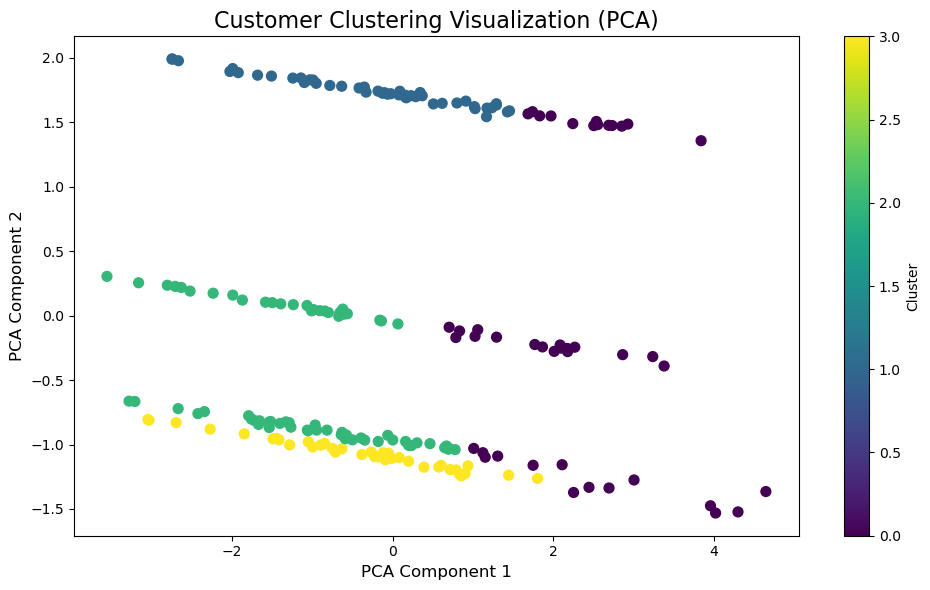

In [27]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(normalized_features)

plt.figure(figsize=(10, 6))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Customer Clustering Visualization (PCA)', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

In [29]:
# Save clustering results
customer_data[['CustomerID', 'Cluster']].to_csv('Clustering_Results.csv', index=False)
print("Clustering Results saved as Clustering_Results.csv")

Clustering Results saved as Clustering_Results.csv
